**INTRODUCCIÖN**

A continuación se importan las librerías pertinentes para el tratamiento y la visualización del data set elegido.

El dataset es tomado de la siguiente ruta: https://colab.research.google.com/corgiredirector?site=https%3A%2F%2Fwww.kaggle.com%2Fdatasets%2Fmeirnizri%2Fcovid19-dataset

Contiene datos estadisticos sobre la pandemia del covid 19 con las siguientes variables:

sex: 1 for female and 2 for male.
age: of the patient.
classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
pneumonia: whether the patient already have air sacs inflammation or not.
pregnancy: whether the patient is pregnant or not.
diabetes: whether the patient has diabetes or not.
copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
asthma: whether the patient has asthma or not.
inmsupr: whether the patient is immunosuppressed or not.
hypertension: whether the patient has hypertension or not.
cardiovascular: whether the patient has heart or blood vessels related disease.
renal chronic: whether the patient has chronic renal disease or not.
other disease: whether the patient has other disease or not.
obesity: whether the patient is obese or not.
tobacco: whether the patient is a tobacco user.
usmr: Indicates whether the patient treated medical units of the first, second or third level.
medical unit: type of institution of the National Health System that provided the care.
intubed: whether the patient was connected to the ventilator.
icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

Referencias:

Boschetti, A. y Massaron, L. (2018). Python Data Science Essentials: A Practitioner's Guide Covering Essential Data Science Principles, Tools, and Techniques (281-331). Packt Publishing Ltd.

In [ ]:
import pandas as pd
import numpy as np
import math as mt
import os

#Importar el dataset alojado en google drive

from google.colab import drive
drive.mount('/content/drive')

!wget 'https://drive.google.com/uc?export=download&id=1c33w8aYOxLeWn30OiHMoDBF-0n-POv1e' -O Datos_semana6_Cancer.csv

data = pd.read_csv('Covid_Data.csv')

data.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--2023-11-21 04:03:24--  https://drive.google.com/uc?export=download&id=1c33w8aYOxLeWn30OiHMoDBF-0n-POv1e
Resolving drive.google.com (drive.google.com)... 142.251.2.102, 142.251.2.113, 142.251.2.100, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-ag-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ia01b22ihoikrkga7vm44f29j0ced6ek/1700539350000/13138142757532442845/*/1c33w8aYOxLeWn30OiHMoDBF-0n-POv1e?e=download&uuid=dec81ffe-551b-4c35-af27-db43b191b873 [following]
--2023-11-21 04:03:26--  https://doc-0k-ag-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ia01b22ihoikrkga7vm44f29j0ced6ek/1700539350000/13138142757532442845/*/1c33w8aYOxLeWn30OiHMoDBF-0n-POv1e?e=download&uuid=dec81ffe-551b-4c35-af2

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

**Limpieza de datos**

Utilizamos la función de pandas .dropna para eliminar aquellos caracteres no deseados

In [ ]:
data.dropna(axis=0, how="all")

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


**Histogramas básicos en seaborn con histplot**

Acontinuación se presenta un histograma horizontal, con argumento definido en 'y'. El argumento 'shrink' controla la escala del grosor de cada barra entre 0 y 1.

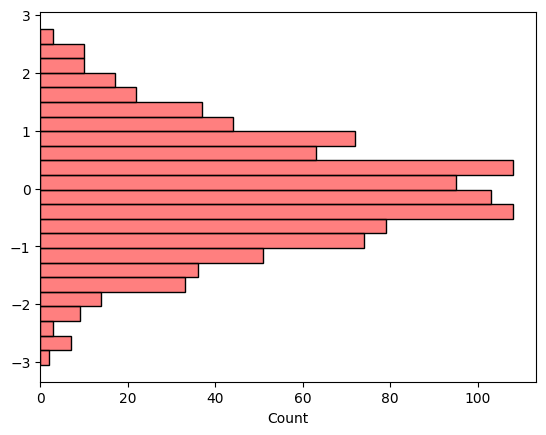

In [ ]:
rng = np.random.RandomState(0)
x = rng.normal(0, 1, size = 1000)
data = {'x': x}
sb.histplot(y = x, color = "red", alpha = 0.5)
plt.show()

<Axes: ylabel='Count'>

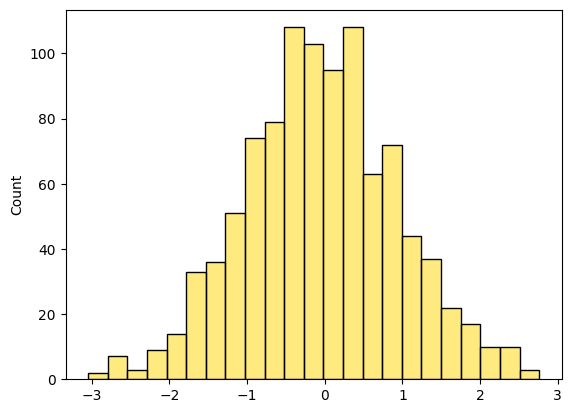

In [ ]:
rng = np.random.RandomState(0)
x = rng.normal(0, 1, size = 1000)
data = {'x': x}

sb.histplot(x = x, color = "gold", alpha = 0.5)

(array([2.65300e+04, 2.33820e+04, 8.52330e+04, 1.96830e+05, 1.95552e+05,
        1.78635e+05, 1.43816e+05, 9.37690e+04, 5.44800e+04, 3.10640e+04,
        1.47370e+04, 3.99400e+03, 4.95000e+02, 3.70000e+01, 2.10000e+01]),
 array([  0.        ,   8.06666667,  16.13333333,  24.2       ,
         32.26666667,  40.33333333,  48.4       ,  56.46666667,
         64.53333333,  72.6       ,  80.66666667,  88.73333333,
         96.8       , 104.86666667, 112.93333333, 121.        ]),
 <BarContainer object of 15 artists>)

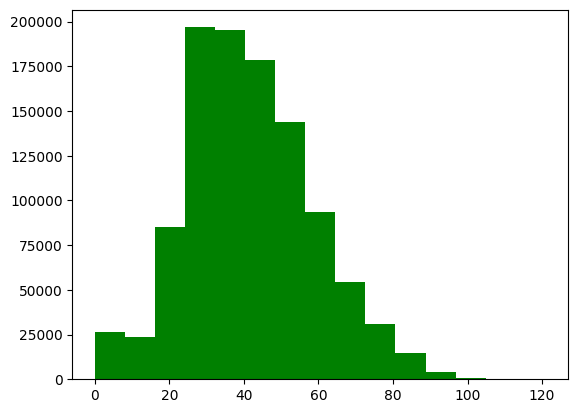

In [ ]:
plt.hist(data["AGE"],bins=15, color="green")

**Gráfico Utilizando SEABORN**


Una matriz de correlación es una tabla que muestra la elación lineal entre varios pares de variables

In [ ]:
#Correlacion Lineal
corr= data.corr
print(corr)

<bound method DataFrame.corr of          USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  \
0            2             1    1             1  03/05/2020       97   
1            2             1    2             1  03/06/2020       97   
2            2             1    2             2  09/06/2020        1   
3            2             1    1             1  12/06/2020       97   
4            2             1    2             1  21/06/2020       97   
...        ...           ...  ...           ...         ...      ...   
1048570      2            13    2             1  9999-99-99       97   
1048571      1            13    2             2  9999-99-99        2   
1048572      2            13    2             1  9999-99-99       97   
1048573      2            13    2             1  9999-99-99       97   
1048574      2            13    2             1  9999-99-99       97   

         PNEUMONIA  AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  \
0                1   65         2 

<ipython-input-34-6ad7f0f788c0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion=data.corr()


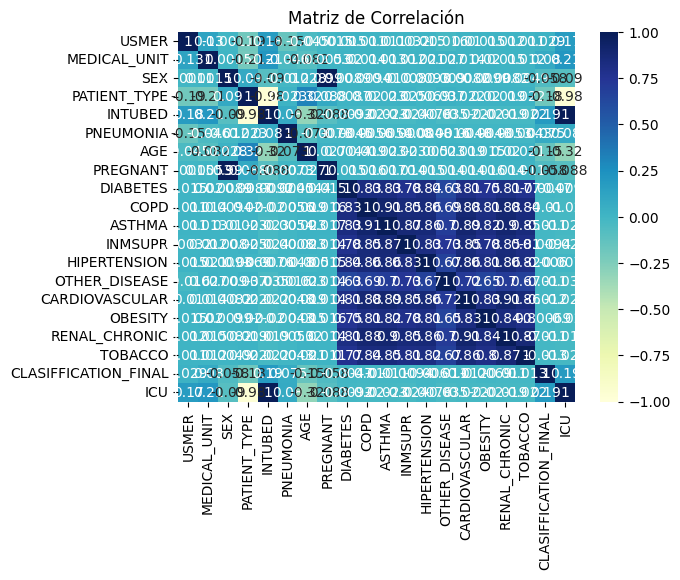

In [ ]:
matriz_correlacion=data.corr()
sb.heatmap(matriz_correlacion,annot=True, cmap="YlGnBu", vmax=1, vmin=-1)
plt.title("Matriz de Correlación")
plt.show()

<ipython-input-35-c2844e512642>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion=data.corr()


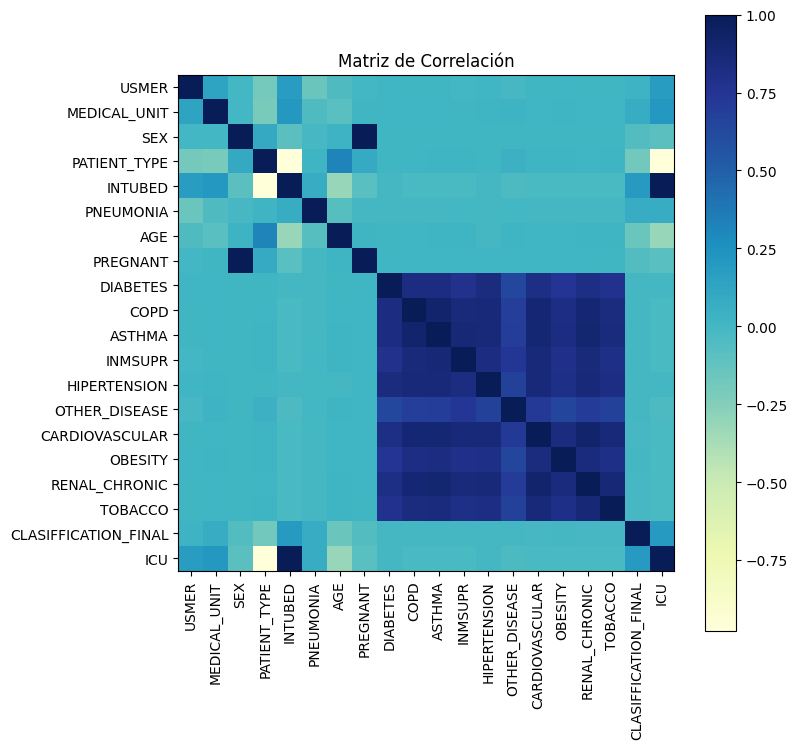

In [ ]:
fig, ax= plt.subplots(figsize= (8, 8))
matriz_correlacion=data.corr()
plt.imshow(matriz_correlacion, cmap="YlGnBu",interpolation="nearest")
plt.colorbar()
plt.title("Matriz de Correlación")
plt.xticks(range(len(matriz_correlacion)),matriz_correlacion.columns, rotation=90)
plt.yticks(range(len(matriz_correlacion)),matriz_correlacion.columns)
plt.show()

**Visualización multivariable utilizando heatmap**

Un mapa de calor es un método de visualización útil para ilustrar datos multivariantes cuando hay muchas variables que comparar, como en un análisis de big data.

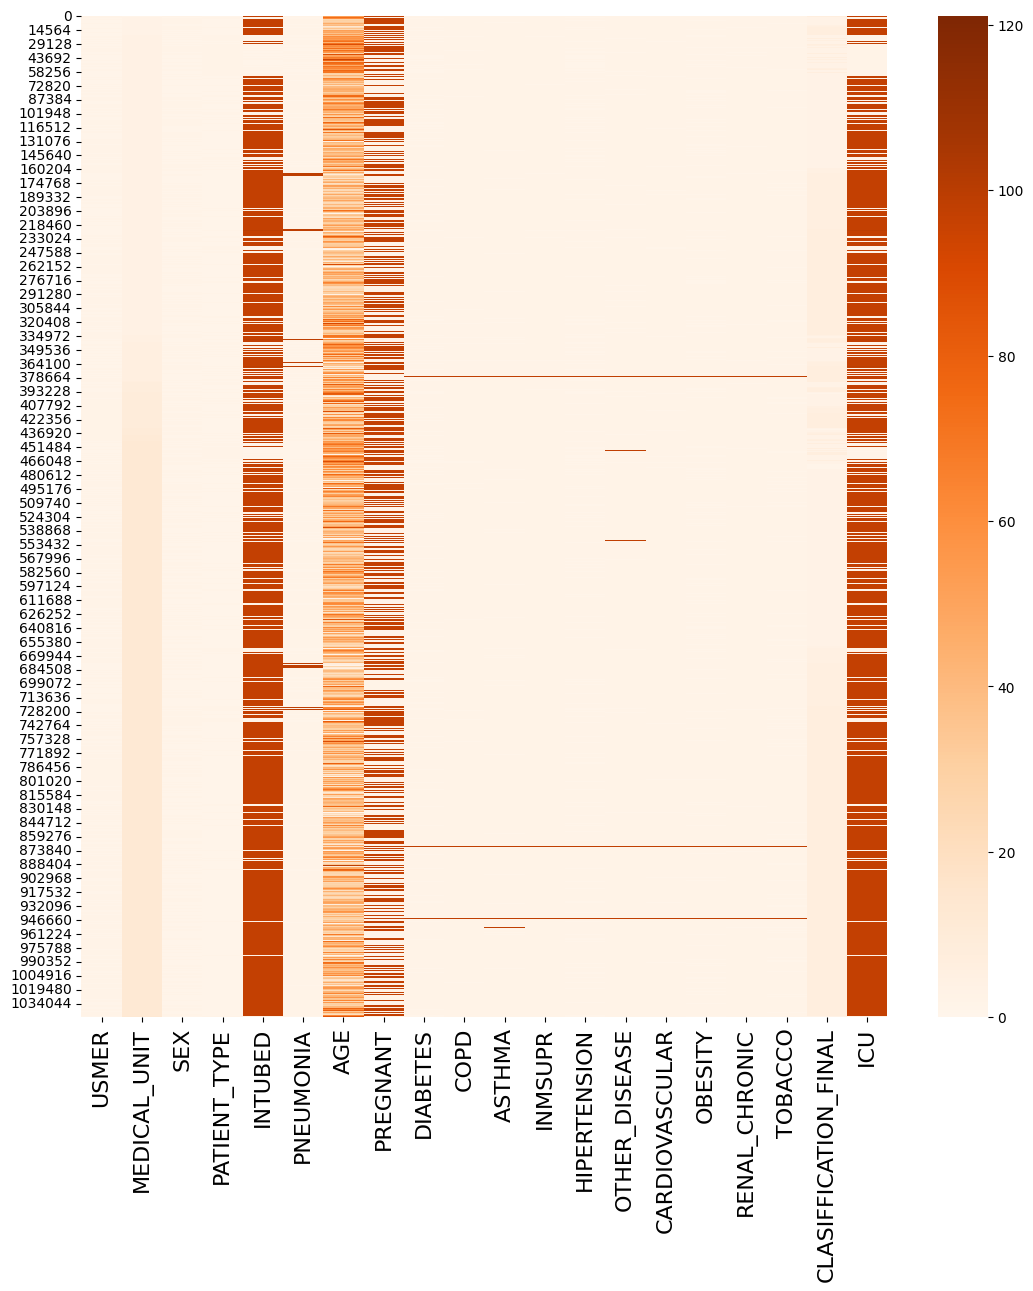

In [ ]:
plt.figure(figsize=(13,13))
sb.heatmap(data.drop(['DATE_DIED'], axis=1), cmap='Oranges')
plt.xticks(fontsize=16)
plt.show()

**Ejemplo de gráfico para la densidad de datos bivariados con gráficos hexagonales**

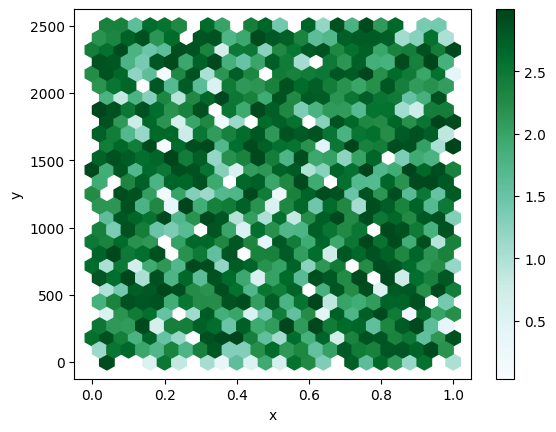

In [ ]:
data = pd.DataFrame(np.random.rand(2500,2), columns=['x', 'y'])
data['y'] = data['y'] = data['y'] +np.arange(2500)
data['z'] =np.random.uniform(0,3,2500)

#Plot the scatter plot
ax1 = data.plot.hexbin(x='x', y='y',C='z',
                       reduce_C_function=np.max,gridsize=25)